1:Load each country’s cleaned CSV

In [2]:
import pandas as pd

# Load cleaned CSVs for each country
benin = pd.read_csv('../../data/clean/benin_clean.csv')
sierraleone = pd.read_csv('../../data/clean/sierraleone_clean.csv')
togo = pd.read_csv('../../data/clean/togo_clean.csv')


2: Metric Comparison

2.1: Boxplots

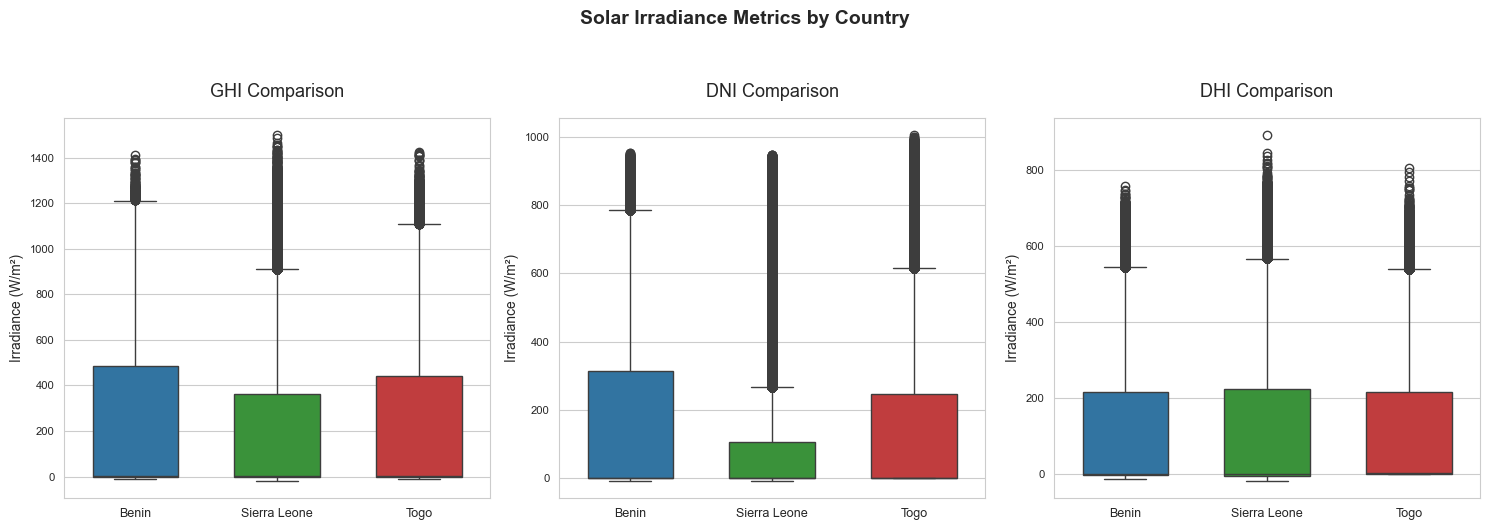

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare data
countries = { 'Benin': benin, 'Sierra Leone': sierraleone, 'Togo': togo}

# Combine data with country labels
combined_df = pd.concat(
    [df.assign(Country=country) for country, df in countries.items()],
    ignore_index=True
)

# Set plot style
sns.set_style("whitegrid")
plt.figure(figsize=(15, 5))

# Create boxplots for each metric
metrics = ['GHI', 'DNI', 'DHI']
palette = {'Benin': '#1f77b4', 'Sierra Leone': '#2ca02c', 'Togo': '#d62728'}

for idx, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, idx)
    sns.boxplot(
        x='Country', 
        y=metric, 
        data=combined_df,
        hue='Country',  # Add hue parameter
        order=['Benin', 'Sierra Leone', 'Togo'],
        palette=palette,
        width=0.6,
        legend=False  # Disable redundant legend
    )
    plt.title(f'{metric} Comparison', fontsize=13, pad=15)
    plt.xlabel('')
    plt.ylabel('Irradiance (W/m²)', fontsize=10)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=8)

plt.suptitle('Solar Irradiance Metrics by Country', y=1.05, fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

2.2: Summary Table

In [7]:
# Calculate summary statistics
summary_stats = (combined_df.groupby('Country')
                 [['GHI', 'DNI', 'DHI']]
                 .agg(['mean', 'median', 'std'])
                 .round(2)
                 .swaplevel(axis=1)  # Organize metrics as columns
                 .sort_index(axis=1, level=0))

# Format column names
summary_stats.columns = [f"{metric} ({stat})" 
                        for stat, metric in summary_stats.columns]

# Display formatted table
print("Summary Statistics of Solar Irradiance Metrics by Country")
display(summary_stats.transpose())

Summary Statistics of Solar Irradiance Metrics by Country


Country,Benin,Sierra Leone,Togo
DHI (mean),115.36,113.72,116.44
DNI (mean),167.19,116.38,151.26
GHI (mean),240.56,201.96,230.56
DHI (median),1.60,-0.10,2.50
DNI (median),-0.10,-0.10,0.00
GHI (median),1.80,0.30,2.10
DHI (std),158.69,158.95,156.52
DNI (std),261.71,218.65,250.96
GHI (std),331.13,298.50,322.53


3. Statistical Testing

In [13]:
from scipy.stats import f_oneway

# Prepare GHI values for each country
ghi_benin = combined_df[combined_df['Country'] == 'Benin']['GHI'].dropna()
ghi_sierraleone = combined_df[combined_df['Country'] == 'Sierra Leone']['GHI'].dropna()
ghi_togo = combined_df[combined_df['Country'] == 'Togo']['GHI'].dropna()

# One-way ANOVA
anova_stat, anova_p = f_oneway(ghi_benin, ghi_sierraleone, ghi_togo)
print(f"One-way ANOVA: F={anova_stat:.2f}, p={anova_p:.4f}")

if anova_p < 0.05:
    print("There are significant differences in GHI between countries (p < 0.05).")
else:
    print("No significant differences in GHI between countries (p >= 0.05).")

One-way ANOVA: F=2090.09, p=0.0000
There are significant differences in GHI between countries (p < 0.05).


In [ ]:
4. Key Observations

In [22]:
import pandas as pd

# Assuming you already have these DataFrames defined
countries = { 'Benin': benin, 'Sierra Leone': sierraleone, 'Togo': togo }

# Compute GHI summary stats for each country
summary_stats = {}
for country, df in countries.items():
    ghi = df['GHI']
    summary_stats[country] = {
        'median': ghi.median(),
        'mean': ghi.mean(),
        'std': ghi.std(),
        'min': ghi.min(),
        'max': ghi.max()
    }

summary_df = pd.DataFrame(summary_stats).T
summary_df


,median,mean,std,min,max
Benin,1.8,240.559452,331.131327,-12.9,1413.0
Sierra Leone,0.3,201.957515,298.495150,-19.5,1499.0
Togo,2.1,230.555040,322.532347,-12.7,1424.0


### GHI Summary Highlights

- Benin has the highest mean GHI and also the widest spread, suggesting a higher and more volatile over time.
- Togo shows the highest median GHI, indicating consistently higher GHI levels despite having a slightly lower mean than Benin.
- Sierra Leone has the lowest median GHI and the lowest mean, but also a wide range, pointing to sporadic extreme values despite generally lower GHI levels.


5. (Bonus) Visual Summary

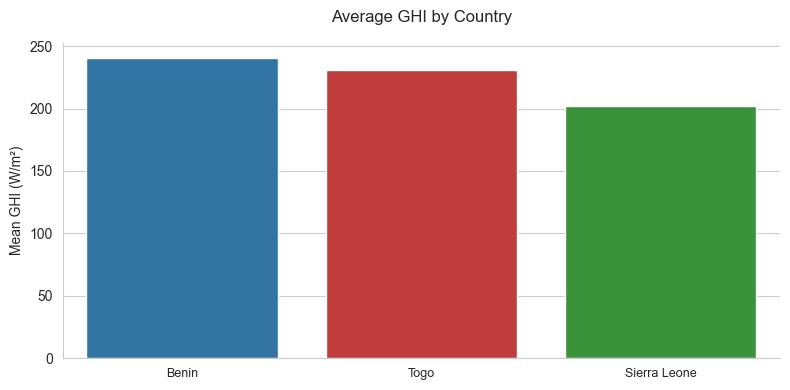

In [24]:
# Bar chart ranking countries by average GHI
plt.figure(figsize=(8, 4))

# Calculate mean GHI for each country
mean_ghi = combined_df.groupby('Country')['GHI'].mean().reindex(['Benin', 'Togo', 'Sierra Leone']).reset_index()

sns.barplot(
    x='Country', 
    y='GHI', 
    data=mean_ghi,
    hue='Country',           # Add this line
    order=['Benin', 'Togo', 'Sierra Leone'],
    palette=palette,
    legend=False             # Add this line to suppress duplicate legend
)
plt.title('Average GHI by Country', fontsize=12, pad=15)
plt.xlabel('')
plt.ylabel('Mean GHI (W/m²)', fontsize=10)
plt.xticks(fontsize=9)
plt.gca().spines[['top','right']].set_visible(False)

plt.tight_layout()
plt.show()